In [2]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c.transform_to('geocentricmeanecliptic')

<SkyCoord (GeocentricMeanEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, )
    (27.76521106, 33.31188749, 1.)>

# 编排文件

In [38]:
with open('/home/haoyanzhen_shao/project/simulation_work/observation_sequence/20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f:
    dat = f.readlines()

In [44]:
num = 0
for i in dat[0].split(' '):
    if len(i)>0:
        num+=1
print(num)

39


> 由于每行的数量为39，故确定编排文件是按照以下文件：
> /home/haoyanzhen_shao/project/simulation_work/observation_sequence/巡天编排模拟结果格式说明20020529.docx

可直接读到的参数包括:
- /home/haoyanzhen_shao/project/csst-simulation/self_test/need/pointing_file_need.txt 中的[2,3,5,6,7,8,9,10,11,12,13,14,18,19]

需要生成的参数包括：
- 0 ra 1 dec
- 4 pos_angle
- 15-17 sat_v

# 生成指向文件

In [49]:
f = pd.read_csv('/home/haoyanzhen_shao/project/simulation_work/observation_sequence/20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',
                delim_whitespace=True,usecols=[0,1,2,3,4,5,6,7,8,9,10,11,14,16,33,34,35,36,37,38],
                names=['time','lat','lon','sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                       'isDeep','exp_time','earth_vx','earth_vy','earth_vz','sat_vx','sat_vy','sat_vz'])
f

,time,lat,lon,sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,isDeep,exp_time,earth_vx,earth_vy,earth_vz,sat_vx,sat_vy,sat_vz
0,2.459767e+06,-35.4331,339.9874,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-1.0,150.0000,28.400740,6.556605,2.843185,-0.062329,5.821834,5.015382
1,2.459767e+06,-34.3701,48.0599,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,999.0,250.8039,28.400183,6.558589,2.844046,-3.232878,4.684874,5.163899
2,2.459767e+06,-31.8898,53.0503,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-1.0,150.4068,28.399736,6.560180,2.844736,-5.352428,3.104319,4.557426
3,2.459767e+06,-27.4606,60.0000,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-1.0,150.4662,28.399422,6.561299,2.845222,-6.455195,1.748725,3.783258
4,2.459767e+06,17.8937,56.5547,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-1.0,150.0000,28.398957,6.562955,2.845941,-7.340225,-0.428847,2.225207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,2.463444e+06,-67.8543,35.2174,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-1.0,150.0000,23.184488,16.479172,7.144325,-3.148644,5.164752,4.727946
656803,2.463444e+06,-68.0315,35.4583,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,-1.0,150.0000,23.170103,16.496630,7.151889,5.226404,5.106638,-2.312176
656804,2.463444e+06,-65.3740,32.7675,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,-1.0,150.0000,23.169387,16.497499,7.152266,4.381511,6.179346,-1.165062
656805,2.463444e+06,-65.3740,32.3247,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,-1.0,150.0000,23.168698,16.498334,7.152627,3.345883,6.896120,-0.002481


In [52]:
sc = SkyCoord(f['lon'],f['lat'],frame='geocentricmeanecliptic',unit='deg')
sc_icrs = sc.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (358.11457363, -39.99919575)>

In [63]:
f['ra'] = sc_icrs.ra.degree
f['dec'] = sc_icrs.dec.degree
f['pos_angle'] = -113.4333
f

,time,lat,lon,sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,...,exp_time,earth_vx,earth_vy,earth_vz,sat_vx,sat_vy,sat_vz,ra,dec,pos_angle
0,2.459767e+06,-35.4331,339.9874,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,...,150.0000,28.400740,6.556605,2.843185,-0.062329,5.821834,5.015382,358.114574,-39.999196,-113.4333
1,2.459767e+06,-34.3701,48.0599,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,...,250.8039,28.400183,6.558589,2.844046,-3.232878,4.684874,5.163899,54.996139,-15.884648,-113.4333
2,2.459767e+06,-31.8898,53.0503,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,...,150.4068,28.399736,6.560180,2.844736,-5.352428,3.104319,4.557426,58.489971,-12.401719,-113.4333
3,2.459767e+06,-27.4606,60.0000,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,...,150.4662,28.399422,6.561299,2.845222,-6.455195,1.748725,3.783258,63.459666,-6.742132,-113.4333
4,2.459767e+06,17.8937,56.5547,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,...,150.0000,28.398957,6.562955,2.845941,-7.340225,-0.428847,2.225207,49.134338,36.706825,-113.4333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,2.463444e+06,-67.8543,35.2174,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,...,150.0000,23.184488,16.479172,7.144325,-3.148644,5.164752,4.727946,61.521547,-49.755326,-113.4333
656803,2.463444e+06,-68.0315,35.4583,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,...,150.0000,23.170103,16.496630,7.151889,5.226404,5.106638,-2.312176,61.780769,-49.863014,-113.4333
656804,2.463444e+06,-65.3740,32.7675,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,...,150.0000,23.169387,16.497499,7.152266,4.381511,6.179346,-1.165062,58.347202,-48.098028,-113.4333
656805,2.463444e+06,-65.3740,32.3247,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,...,150.0000,23.168698,16.498334,7.152627,3.345883,6.896120,-0.002481,58.108132,-48.190737,-113.4333


In [65]:
fr = f.reindex(columns=['ra','dec','lon','lat','pos_angle','time','sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                       'sat_vx','sat_vy','sat_vz','exp_time','isDeep','earth_vx','earth_vy','earth_vz'])
fr.columns = ['ra','dec','lon(ecliptic)','lat(ecliptic)','pos_angle','time(julian)','sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                'sat_vx','sat_vy','sat_vz','exp_time','isDeep','earth_vx','earth_vy','earth_vz']
fr

,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,...,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep,earth_vx,earth_vy,earth_vz
0,358.114574,-39.999196,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,-1296.0505,-3.708855e+07,...,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0,28.400740,6.556605,2.843185
1,54.996139,-15.884648,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,716.5418,-3.709960e+07,...,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0,28.400183,6.558589,2.844046
2,58.489971,-12.401719,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,2249.4202,-3.710846e+07,...,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0,28.399736,6.560180,2.844736
3,63.459666,-6.742132,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,3169.0076,-3.711469e+07,...,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0,28.399422,6.561299,2.845222
4,49.134338,36.706825,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,4156.0892,-3.712392e+07,...,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0,28.398957,6.562955,2.845941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,-1988.9282,-9.221583e+07,...,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0,23.184488,16.479172,7.144325
656803,61.780769,-49.863014,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,...,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0,23.170103,16.496630,7.151889
656804,58.347202,-48.098028,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,...,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0,23.169387,16.497499,7.152266
656805,58.108132,-48.190737,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,...,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0,23.168698,16.498334,7.152627


In [67]:
fpointing = fr[['ra','dec','lon(ecliptic)','lat(ecliptic)','pos_angle','time(julian)','sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                'sat_vx','sat_vy','sat_vz','exp_time','isDeep']]


,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
0,358.114574,-39.999196,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0
1,54.996139,-15.884648,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0
2,58.489971,-12.401719,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0
3,63.459666,-6.742132,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0
4,49.134338,36.706825,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0
656803,61.780769,-49.863014,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0
656804,58.347202,-48.098028,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0
656805,58.108132,-48.190737,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0


In [72]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','w') as f:
    f.write('# ra dec lon(ecliptic) lat(ecliptic) pos_angle time(julian) sat_x sat_y sat_z sun_x sun_y sun_z moon_x moon_y moon_z sat_vx sat_vy sat_vz exp_time isDeep\n')
fpointing.to_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',sep=' ',index=False,header=False,mode='a')

# 观察星表分布

In [12]:
hdus = fits.open('/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.0-Bulge-GDR3-G21.0-rev_J2000.fits')

In [23]:
table = Table.read('/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.0-Bulge-GDR3-G21.0-rev_J2000.fits')

In [28]:
table[:5]

RA,Dec,app_Gaia_G,app_Gaia_Bp,app_Gaia_Rp,px,py,pz,vx,vy,vz,Dist,grav,teff,feh,app_sdss_u,app_sdss_g,app_sdss_r,app_sdss_i,app_sdss_z,exbv_solar,FromTag,SourceID,Gmag,Bp,Rp,pmra,pmdec,parallax,RV,FlagGDR3
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10,int64,float64,float64,float64,float64,float64,float64,float64,int16
270.4234848860015,-29.929561737099327,18.91877,19.330787345428465,18.306863471527098,--,--,--,0.0,0.0,0.0,7898.902637063288,4.629144191741943,5240.33056640625,-0.7969920039176941,20.868661567230223,19.48086325790405,18.889473125,18.705137893218993,18.62761037017822,0.10123484581708908,GDR3,4050229137396412032,18.91877,--,--,-6.127052060651377,1.5204130530092967,0.12659986405045592,-77.10726085527183,1
270.42911797098736,-29.927534589699434,17.582746505737305,18.35445785522461,16.68140411376953,39.98628827919103,-5338.453887663418,-3073.2446947943013,0.0,0.0,0.0,6159.994341373735,5.000506401062012,4169.81640625,-0.8762342929840088,20.94357681274414,18.732425689697266,17.583484649658203,17.15985679626465,16.91864776611328,0.10747657716274261,GDR3,4050229137453213440,17.84936,18.24911,16.52014,6.436516198204194,6.132350227933109,0.16233781146250062,-42.17616170407257,1
270.4297270083961,-29.926248694048137,18.413162231445312,19.080265045166016,17.5842342376709,36.60929792069343,-4881.293183274199,-2809.9254133691575,0.0,0.0,0.0,5632.411897927901,4.931492328643799,4367.24951171875,-1.2478822469711304,21.398460388183594,19.391571044921875,18.401172637939453,18.037858963012695,17.83431625366211,0.10113461315631866,GDR3,4050229137453218304,18.82285,18.90678,17.34803,-4.177892180476935,-3.6901980794949187,0.17754383346287023,-106.06434011975821,1
270.4275110217913,-29.927427526162912,17.948135375976562,18.836816787719727,16.97458839416504,45.95663574430154,-6159.127531495152,-3545.6829102245283,0.0,0.0,0.0,7106.957854311035,5.091550350189209,3940.4560546875,-0.8167966604232788,21.693607330322266,19.28965187072754,17.991172790527344,17.481874465942383,17.184877395629883,0.09874871373176575,GDR3,4050229137453222528,17.98788,18.82219,16.94947,-0.7123509129620561,-6.992076734094015,0.14070718027311876,-80.23291530446708,1
270.44063792723887,-29.918507899318886,17.79676628112793,18.49454116821289,16.945762634277344,31.479477595451755,-4093.1934232658245,-2355.5211942502688,0.0,0.0,0.0,4722.679428997283,5.073787212371826,4243.6279296875,-2.4096391201019287,20.805992126464844,18.825363159179688,17.80708885192871,17.40656280517578,17.177993774414062,0.10618218034505844,GDR3,4050229167687219584,17.97473,18.42094,16.8414,-0.5058283648596918,-2.8629643406993464,0.21174420475376612,15.891844436326757,1


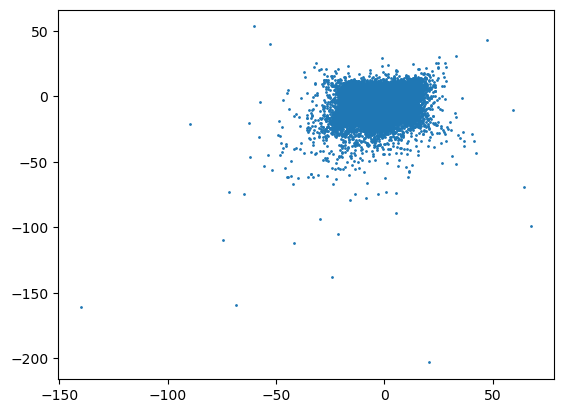

In [33]:
plt.scatter(table['pmra'],table['pmdec'],s=1)

# 生成NGP指向子文件（第一期）

## 读取部分

读取星表

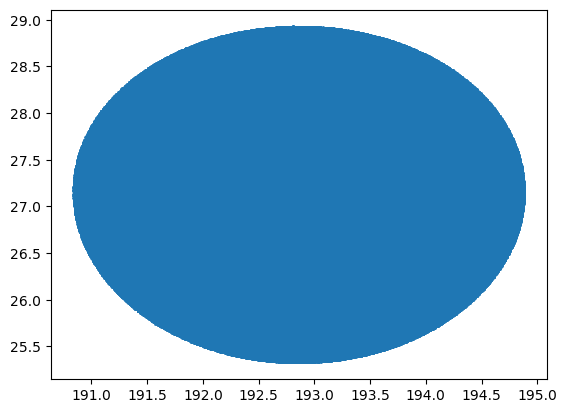

In [2]:
cat = Table.read('/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.8-NGP-GDR3-G28.0-rev_J2000.fits')
plt.scatter(cat['RA'],cat['Dec'],s=1)

读取指向文件

In [3]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f:
    names = f.readlines()[0].strip()[1:].split(' ')[1:]
pointing = pd.read_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',names=names,sep=' ',comment='#')
pointing

,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
0,358.114574,-39.999196,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0
1,54.996139,-15.884648,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0
2,58.489971,-12.401719,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0
3,63.459666,-6.742132,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0
4,49.134338,36.706825,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0
656803,61.780769,-49.863014,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0
656804,58.347202,-48.098028,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0
656805,58.108132,-48.190737,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0


选取NGP天区

In [8]:
selection = pointing[(pointing['ra']<195) & (pointing['ra']>191) & (pointing['dec']<29) & (pointing['dec']>25.5)]

## 查看部分

按时间序列查看NGP天区的观测

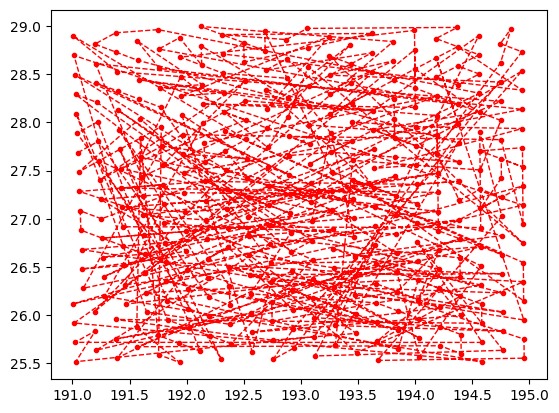

In [22]:
ss = selection.sort_values('time(julian)')
plt.plot(ss['ra'],ss['dec'],'.--',c='r',linewidth=1)

查看单日观测序列

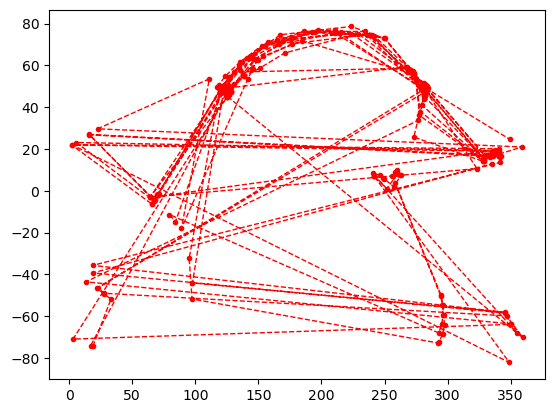

In [46]:
selection2 = pointing[(pointing['time(julian)']>2.461320e6) & (pointing['time(julian)']<2.461321e6)]
sss = selection2.sort_values('time(julian)')
plt.plot(sss['ra'],sss['dec'],'.--',c='r',linewidth=1)

查看1/4全球观测覆盖

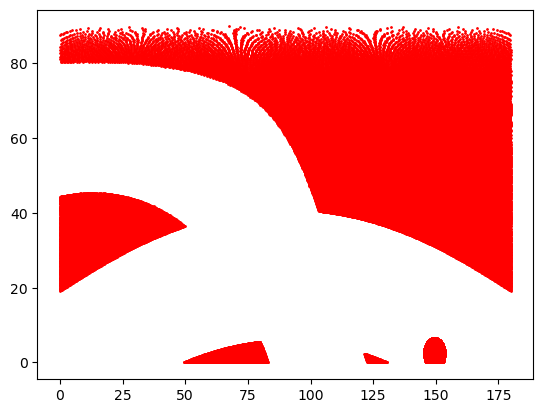

In [38]:
selection3 = pointing[(pointing['ra']>0) & (pointing['ra']<180) & (pointing['dec']>0) & (pointing['dec']<90)]
ssss = selection3.sort_values('time(julian)')
plt.scatter(ssss['ra'],ssss['dec'],c='r',s=1)

查看2/13个全球观测覆盖

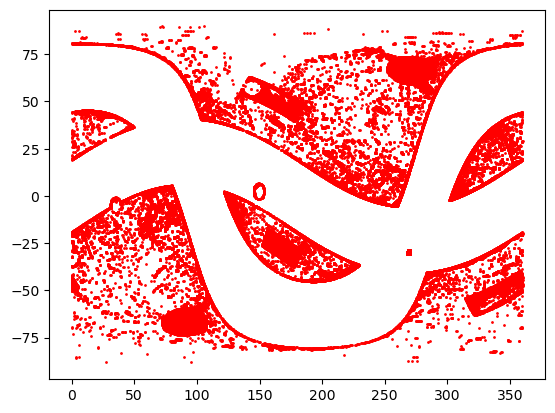

In [51]:
sssss = pointing.sort_values('time(julian)')
plt.scatter(sssss['ra'][:100000],sssss['dec'][:100000],c='r',s=1)

查看银道坐标系的全球覆盖

In [52]:
sc = SkyCoord(pointing['ra'],pointing['dec'],frame='icrs',unit='deg')
sc_gal = sc.transform_to('galactic')


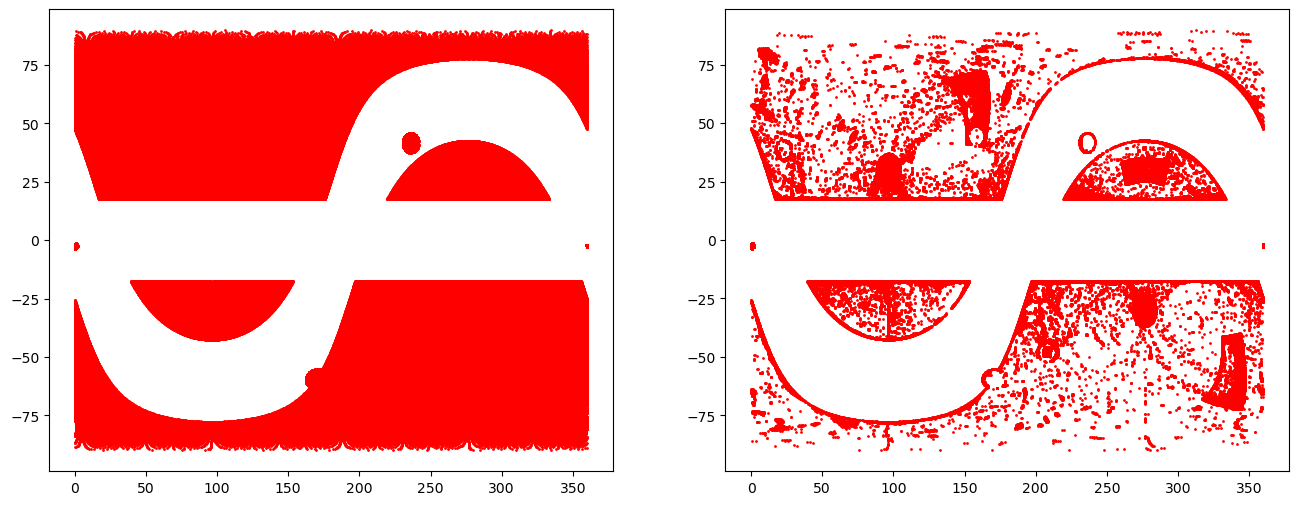

In [58]:
pointing['gal_ra'] = sc_gal.l.degree
pointing['gal_dec'] = sc_gal.b.degree
sp6 = pointing.sort_values('time(julian)')
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(sp6['gal_ra'],sp6['gal_dec'],c='r',s=1)
plt.subplot(122)
plt.scatter(sp6['gal_ra'][:100000],sp6['gal_dec'][:100000],c='r',s=1)

银道坐标系的全球覆盖密度分布

/home/haoyanzhen_shao/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


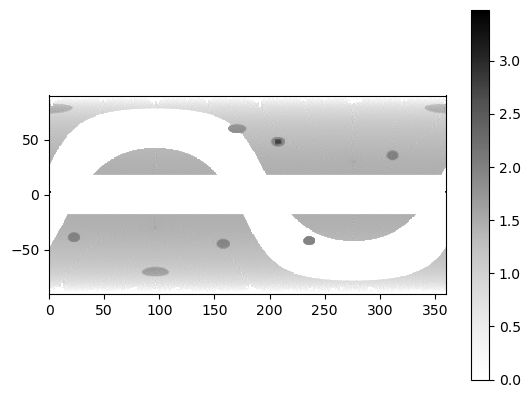

In [66]:
# desity = np.empty(18,9)
# for i in range(18):
#     for j in range(9):
#         desity[i,j] = len(pointing[])

desity = np.histogram2d(pointing['gal_ra'],pointing['gal_dec'],bins=(360,180),range=[[0,360],[-90,90]])
plt.imshow(np.log10(desity[0]).T,cmap='Greys',extent=[0,360,-90,90])
plt.colorbar()

全球观测密度分布平均与NGP观测密度分布平均

In [76]:
np.average(desity[0])/40000*(360*180)

16.420175

In [ ]:
np.average(desity[0][191:195,25:29])

13.875

查看小天区内的指向分布

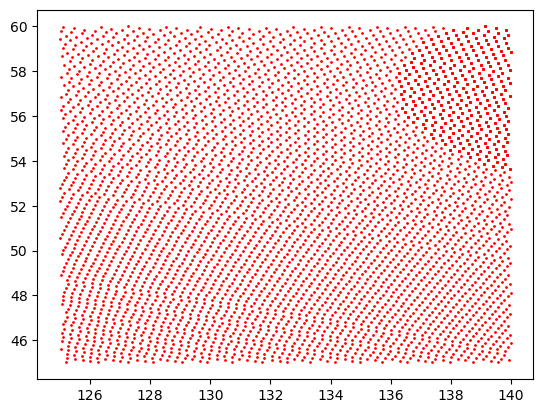

In [39]:
selection3 = pointing[(pointing['ra']>125) & (pointing['ra']<140) & (pointing['dec']>45) & (pointing['dec']<60)]
ssss = selection3.sort_values('time(julian)')
plt.scatter(ssss['ra'],ssss['dec'],c='r',s=1)

## 选取部分

查看NGP区域内的星表和指向分布

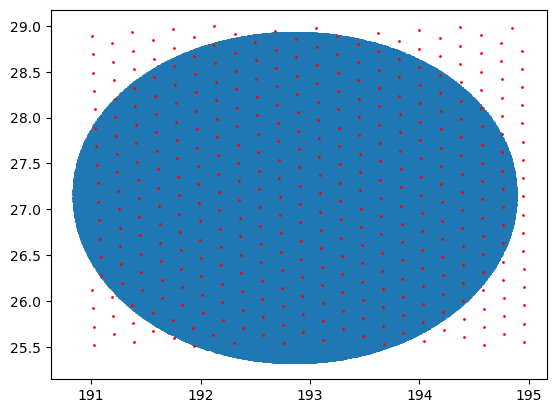

In [9]:
plt.scatter(cat['RA'],cat['Dec'],s=1)
plt.scatter(selection['ra'],selection['dec'],c='r',s=1)

选定7个指向
>  废案：(192,26.5) (192,27.5) (192.9,26.1) (192.9,27) (192.9,28.1) (193.8,26.7) (193.8,27.7)

> 为保证最大重叠次数，重新选取：(192.75,26.9) (192.75,27.2) (192.9,26.8) (192.9,27.05) (192.9,27.25) (193.1,27.0) (193.1,27.2)

In [4]:
definition = pointing[(pointing['ra']>192.7) & (pointing['ra']<193.1) & (pointing['dec']>26.8) & (pointing['dec']<27.3)]
definition = definition[['ra','dec','lon(ecliptic)','lat(ecliptic)','pos_angle','time(julian)','sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                'sat_vx','sat_vy','sat_vz','exp_time','isDeep']]
definition.sort_values(['ra','dec'])


,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
307805,192.722480,27.139067,179.8932,29.7638,-113.4333,2.461202e+06,-1549.4674,-5812.6210,3073.7484,2.815993e+07,1.369301e+08,5.935684e+07,358080.8985,84662.5057,61325.6355,5.595911,-3.555551,-3.895294,150.0,-1.0
145515,192.726849,26.939061,180.0000,29.5866,-113.4333,2.460424e+06,-1659.3150,-6477.1638,-952.1038,1.255340e+08,7.604407e+07,3.296318e+07,-356361.8876,-165794.5509,-80240.6689,5.687109,-0.705505,-5.124602,150.0,-1.0
404946,192.904692,27.256055,180.0000,29.9409,-113.4333,2.461626e+06,-4766.7116,-1441.8418,4574.2777,-1.086825e+08,9.708597e+07,4.208479e+07,-284283.8407,-224267.7003,-136111.8429,1.695386,-7.463904,-0.587877,150.0,-1.0
307887,192.908833,27.056210,180.1068,29.7638,-113.4333,2.461202e+06,-1483.9099,-5910.1177,2916.5700,2.752122e+07,1.370437e+08,5.940609e+07,349495.6448,104022.3980,71187.4229,5.581050,-3.403478,-4.049238,150.0,-1.0
80866,192.913020,26.856323,180.2133,29.5866,-113.4333,2.460082e+06,-3624.5105,-3438.8612,-4561.2501,8.480750e+07,1.149317e+08,4.982130e+07,335436.5722,163100.1590,66763.6601,4.893821,-5.884925,0.545745,150.0,-1.0
389505,193.091209,27.173104,180.2140,29.9409,-113.4333,2.461556e+06,-1862.4800,-4586.1368,4584.8822,5.554887e+07,1.294654e+08,5.612037e+07,390174.0114,-6448.2174,24925.2172,7.113467,-2.919623,-0.033240,150.0,-1.0
307950,193.095171,26.973377,180.3205,29.7638,-113.4333,2.461203e+06,-1500.0066,-5942.1488,2841.6230,2.704217e+07,1.371271e+08,5.944228e+07,342170.8876,118277.7258,78402.1959,5.549135,-3.374056,-4.118079,150.0,-1.0


## 生成子指向文件

In [5]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_NGP_230228.dat','w') as f:
    f.write('# ')
    with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f2:
        names = f2.readlines()[0].strip()[1:].split(' ')[1:]
    for i in names:
        f.write(i)
        f.write(' ')
    f.write('\n')
definition.to_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_NGP_230228.dat',sep=' ',index=False,header=False,mode='a')

# 生成中等密度星场指向子文件（第一期）

读取星表

In [26]:
catpath = '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.5-ant-GDR3-G28.0-rev_J2000.fits'
cat=Table.read(catpath)

读取指向文件

In [27]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f:
    names = f.readlines()[0].strip()[1:].split(' ')[1:]
pointing = pd.read_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',names=names,sep=' ',comment='#')
pointing

,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
0,358.114574,-39.999196,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0
1,54.996139,-15.884648,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0
2,58.489971,-12.401719,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0
3,63.459666,-6.742132,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0
4,49.134338,36.706825,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0
656803,61.780769,-49.863014,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0
656804,58.347202,-48.098028,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0
656805,58.108132,-48.190737,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0


查看指向覆盖

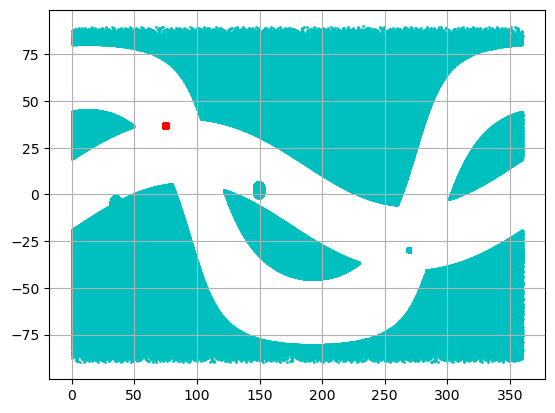

In [28]:
ra = cat['RA']
dec = cat['Dec']
plt.scatter(ra,dec,s=1,c='r')
plt.scatter(pointing['ra'],pointing['dec'],c='c',s=1)
plt.grid()

**指向偏移**

可能与后续仿真产生重大偏离

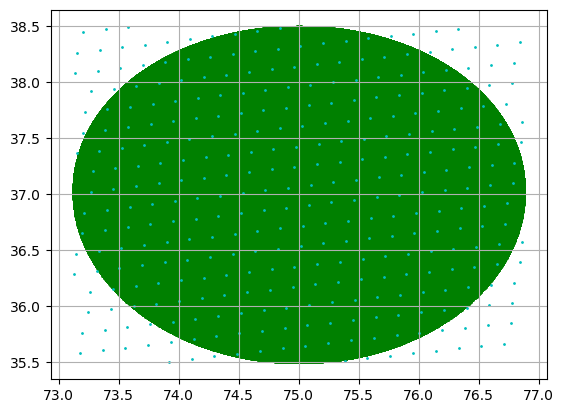

In [38]:
pointing_shift = pointing.copy()
pointing_shift['dec'] = pointing_shift['dec']+50
pointing_shift = pointing_shift[(pointing_shift['ra']>ra.min())&(pointing_shift['ra']<ra.max())
                                &(pointing_shift['dec']>dec.min())&(pointing_shift['dec']<dec.max())]
plt.scatter(ra,dec,s=1,c='g')
plt.scatter(pointing_shift['ra'],pointing_shift['dec'],c='c',s=1)
plt.grid()

选取指向
> 选取x,y在[74.7,75.1],[36.88,37.3]中的七个点


In [47]:
definition = pointing_shift[(pointing_shift['ra']>74.7) & (pointing_shift['ra']<75.1) 
                      & (pointing_shift['dec']>36.88) & (pointing_shift['dec']<37.3)]
definition = definition[['ra','dec','lon(ecliptic)','lat(ecliptic)','pos_angle','time(julian)',
                         'sat_x','sat_y','sat_z','sun_x','sun_y','sun_z','moon_x','moon_y','moon_z',
                        'sat_vx','sat_vy','sat_vz','exp_time','isDeep']]
definition.sort_values(['ra','dec'])


,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
284601,74.721893,37.038565,71.6361,-35.4331,-113.4333,2.461109e+06,-4006.9316,5437.7791,-507.3661,1.456830e+08,-2.659275e+07,-1.152884e+07,-200429.3098,-305351.0654,-172374.8576,-4.323008,-3.670258,-5.170092,150.0000,-1.0
284725,74.774511,37.223865,71.7276,-35.2559,-113.4333,2.461110e+06,-3865.9993,5529.9201,-599.2795,1.458894e+08,-2.569746e+07,-1.114075e+07,-172067.9332,-319135.5865,-178726.5980,-4.378396,-3.621947,-5.157196,150.0000,-1.0
284832,74.895540,36.881837,71.8176,-35.6102,-113.4333,2.461110e+06,-3811.9883,5542.6366,-796.2910,1.460895e+08,-2.480045e+07,-1.075192e+07,-142532.1138,-330754.5297,-183865.0207,-4.335863,-3.720577,-5.122581,150.0000,-1.0
353158,74.910528,37.062254,71.8636,-35.4331,-113.4333,2.461397e+06,-3000.4065,4007.5123,4528.4674,1.469085e+06,-1.350089e+08,-5.852310e+07,107216.3420,301355.5420,163165.7346,-6.541999,-3.947896,-0.839394,150.0000,-1.0
318158,74.963024,37.247421,71.9546,-35.2559,-113.4333,2.461248e+06,-204.9897,5002.3685,-4550.5438,-8.364152e+07,1.163641e+08,5.044185e+07,12364.9609,-357928.6216,-189179.2982,-7.579699,-0.933760,-0.693851,150.2752,-1.0
372227,75.084321,36.905312,72.0456,-35.6102,-113.4333,2.461478e+06,-1522.6287,6254.9148,-2057.9557,1.473139e+08,-1.842732e+07,-7.988294e+06,225106.4335,263057.7306,151311.7913,-5.412245,-2.851586,-4.646285,150.0000,-1.0
346352,75.099101,37.085645,72.0910,-35.4331,-113.4333,2.461368e+06,5713.5498,3310.5508,-1488.1569,-7.094032e+07,-1.188769e+08,-5.152978e+07,221915.9220,248945.1096,142369.8304,-3.854226,4.444123,-4.930981,150.0000,-1.0


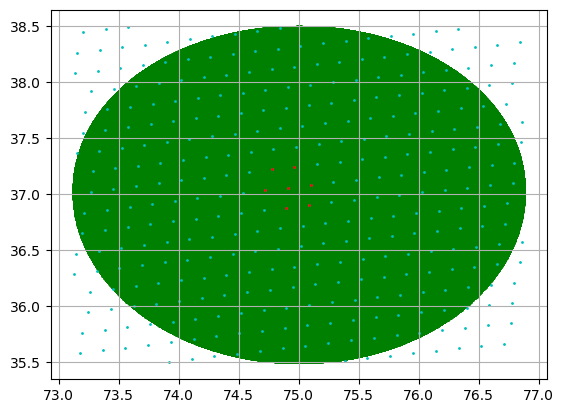

In [48]:
plt.scatter(ra,dec,s=1,c='g')
plt.scatter(pointing_shift['ra'],pointing_shift['dec'],c='c',s=1)
plt.scatter(definition['ra'],definition['dec'],c='r',s=1)
plt.grid()

生成指向文件

In [49]:
difinition_path = '/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_Ant_230310.dat'
with open(difinition_path,'w') as f:
    f.write('# ')
    with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f2:
        names = f2.readlines()[0].strip()[1:].split(' ')[1:]
    for i in names:
        f.write(i)
        f.write(' ')
    f.write('\n')
definition.to_csv(difinition_path,sep=' ',index=False,header=False,mode='a')

# 生成包含各种坐标系位置信息的指向文件

> need by peng at 2023.05.09

In [3]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','r') as f:
    names = f.readlines()[0].strip()[1:].split(' ')[1:]
pointing = pd.read_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',names=names,sep=' ',comment='#')
pointing

,ra,dec,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,sat_z,sun_x,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
0,358.114574,-39.999196,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,-1296.0505,-3.708855e+07,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0
1,54.996139,-15.884648,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,716.5418,-3.709960e+07,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0
2,58.489971,-12.401719,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,2249.4202,-3.710846e+07,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0
3,63.459666,-6.742132,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,3169.0076,-3.711469e+07,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0
4,49.134338,36.706825,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,4156.0892,-3.712392e+07,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,-1988.9282,-9.221583e+07,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0
656803,61.780769,-49.863014,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,-4142.6244,-9.231181e+07,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0
656804,58.347202,-48.098028,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,-4502.5075,-9.231659e+07,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0
656805,58.108132,-48.190737,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,-4618.5915,-9.232118e+07,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0


In [5]:
import astropy.units as u

coor = SkyCoord(ra=pointing['ra'].to_numpy()*u.degree,dec=pointing['dec'].to_numpy()*u.degree,frame='icrs')
coor_gal = coor.transform_to('galactic')
l,b = coor_gal.l.degree, coor_gal.b.degree
l,b

(array([342.70240542, 205.72210838, 203.15667723, ..., 256.23935363,
        256.43709019, 256.54035947]),
 array([-72.25499118, -49.4263138 , -44.89102574, ..., -49.12025463,
        -49.25193039, -49.06824163]))

In [6]:
pointing.insert(2,'gall',l)
pointing.insert(3,'galb',b)
pointing

,ra,dec,gall,galb,lon(ecliptic),lat(ecliptic),pos_angle,time(julian),sat_x,sat_y,...,sun_y,sun_z,moon_x,moon_y,moon_z,sat_vx,sat_vy,sat_vz,exp_time,isDeep
0,358.114574,-39.999196,342.702405,-72.254991,339.9874,-35.4331,-113.4333,2.459767e+06,6526.2872,1184.8656,...,1.353362e+08,5.866785e+07,-383422.6390,-52436.0748,3308.4446,-0.062329,5.821834,5.015382,150.0000,-1.0
1,54.996139,-15.884648,205.722108,-49.426314,48.0599,-34.3701,-113.4333,2.459767e+06,5874.8539,3262.1114,...,1.353336e+08,5.866674e+07,-383352.4153,-52779.8958,3130.1755,-3.232878,4.684874,5.163899,250.8039,999.0
2,58.489971,-12.401719,203.156677,-44.891026,53.0503,-31.8898,-113.4333,2.459767e+06,4521.1101,4490.2633,...,1.353315e+08,5.866585e+07,-383295.7830,-53055.6950,2987.1518,-5.352428,3.104319,4.557426,150.4068,-1.0
3,63.459666,-6.742132,199.523436,-37.917543,60.0000,-27.4606,-113.4333,2.459767e+06,3219.2664,5025.3162,...,1.353301e+08,5.866523e+07,-383255.8143,-53249.5594,2886.6053,-6.455195,1.748725,3.783258,150.4662,-1.0
4,49.134338,36.706825,152.778522,-17.618048,56.5547,17.8937,-113.4333,2.459767e+06,952.8591,5242.0945,...,1.353280e+08,5.866430e+07,-383196.3917,-53536.5993,2737.7151,-7.340225,-0.428847,2.225207,150.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656802,61.521547,-49.755326,257.912487,-46.704143,35.2174,-67.8543,-113.4333,2.463444e+06,4560.5878,4589.7214,...,1.107144e+08,4.799157e+07,244668.3582,275920.9130,109454.7585,-3.148644,5.164752,4.727946,150.0000,-1.0
656803,61.780769,-49.863014,258.010819,-46.517011,35.4583,-68.0315,-113.4333,2.463444e+06,2695.9165,-4638.0427,...,1.106461e+08,4.796197e+07,241565.0103,278660.8797,110249.4146,5.226404,5.106638,-2.312176,150.0000,-1.0
656804,58.347202,-48.098028,256.239354,-49.120255,32.7675,-65.3740,-113.4333,2.463444e+06,3690.2784,-3470.0030,...,1.106427e+08,4.796049e+07,241409.7736,278796.3724,110288.6174,4.381511,6.179346,-1.165062,150.0000,-1.0
656805,58.108132,-48.190737,256.437090,-49.251930,32.3247,-65.3740,-113.4333,2.463444e+06,4458.4997,-2170.1069,...,1.106394e+08,4.795908e+07,241260.5344,278926.4912,110326.2569,3.345883,6.896120,-0.002481,150.0000,-1.0


In [7]:
with open('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat','w') as f:
    f.write('# ra dec gall galb lon(ecliptic) lat(ecliptic) pos_angle time(julian) sat_x sat_y sat_z sun_x sun_y sun_z moon_x moon_y moon_z sat_vx sat_vy sat_vz exp_time isDeep\n')
pointing.to_csv('/home/haoyanzhen_shao/project/simulation_work/pointing/pointing_20220503_WL_2.5yr_tA_60_ML_1.0yr_tA_90_9deg2_tA_80_post.dat',sep=' ',index=False,header=False,mode='a')